In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import requests 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#................................Dibetes predicton.......................................................
#Data analysis
#Data slicing 
#Applying Condition
#Handling Missing Value
#Outlier 
#Model

In [3]:
data=pd.read_csv("diabetes-1.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.shape

(768, 9)

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Slicing

In [8]:
data.iloc[2] #show index 2 all information

Pregnancies                   8.000
Glucose                     183.000
BloodPressure                64.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          23.300
DiabetesPedigreeFunction      0.672
Age                          32.000
Outcome                       1.000
Name: 2, dtype: float64

In [9]:
data.iloc[-1] #show the last index 

Pregnancies                  1.000
Glucose                     93.000
BloodPressure               70.000
SkinThickness               31.000
Insulin                      0.000
BMI                         30.400
DiabetesPedigreeFunction     0.315
Age                         23.000
Outcome                      0.000
Name: 767, dtype: float64

In [10]:
data.iloc[0:3,0:6] #row,column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6,148,72,35,0,33.6
1,1,85,66,29,0,26.6
2,8,183,64,0,0,23.3


In [11]:
data.iloc[:,:] #show all

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
data.loc[[2,5,8,116]] #specific value

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
8,2,197,70,45,543,30.5,0.158,53,1
116,5,124,74,0,0,34.0,0.220,38,1


In [13]:
data.loc[2:6,'Age':'Outcome']

,Age,Outcome
2,32,1
3,21,0
4,33,1
5,30,0
6,26,1


# Applying Condition

In [14]:
data[data.Outcome==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [15]:
data[data.Age>50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52,1
734,2,105,75,0,0,23.3,0.560,53,0
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1


In [16]:
data[(data.Age>50)&(data['Outcome']==1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
24,11,143,94,33,146,36.6,0.254,51,1
39,4,111,72,47,207,37.1,1.390,56,1
43,9,171,110,24,240,45.4,0.721,54,1
53,8,176,90,34,300,33.7,0.467,58,1
93,4,134,72,0,0,23.8,0.277,60,1
115,4,146,92,0,0,31.2,0.539,61,1


In [17]:
data[(data.Age>50)&(data['Outcome']==0)][['Glucose','BloodPressure']]

,Glucose,BloodPressure
12,139,80
28,145,82
30,109,75
67,109,92
123,132,80
140,128,78
148,147,78
204,103,72
212,179,95
223,142,60


# Handling missing values

In [18]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
data.shape

(768, 9)

If missing value occured:

In [20]:
data2=pd.read_csv("diabetes.csv")
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [21]:
data2.dropna(inplace=True)
data2.shape

(338, 9)

In [22]:
data2=pd.read_csv("diabetes.csv")
data2
data2.fillna(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47,1


# Outlier

In [23]:
data['Pregnancies'].mean()

3.8450520833333335

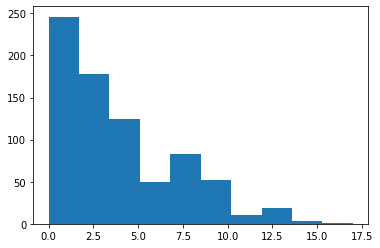

In [24]:
plt.hist(data['Pregnancies'],bins=10)
plt.show()

In [25]:
lowerlimit=data['Pregnancies'].quantile(0.25)
lowerlimit

1.0

In [26]:
upperlimit=data['Pregnancies'].quantile(0.75)
upperlimit

6.0

In [27]:
result2=data[(data['Pregnancies']>lowerlimit) & (data['Pregnancies']<=upperlimit)]
result2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
752,3,108,62,24,0,26.0,0.223,25,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
764,2,122,70,27,0,36.8,0.340,27,0


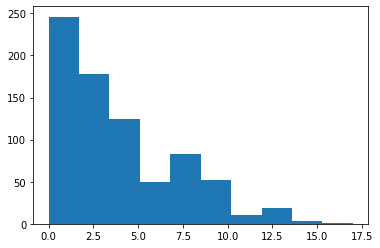

In [28]:
plt.hist(data['Pregnancies'],bins=10)
plt.show()

# Model

In [29]:
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values

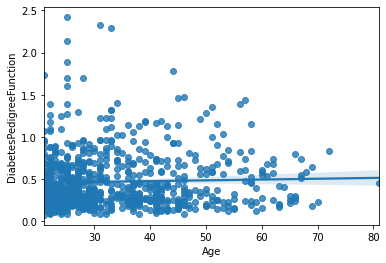

In [30]:
sns.regplot(x="Age",y="DiabetesPedigreeFunction",data=data);

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((652, 8), (652,), (116, 8), (116,))

In [32]:
scale=StandardScaler()
X=scale.fit_transform(X)
X


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [33]:
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression()
slr.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred = slr.predict(X_test)

In [36]:
slr.score(X_test,y_test)

0.8275862068965517